In [195]:
import numpy as np
import pandas as pd

In [196]:
df = pd.read_csv("spam.csv", encoding="latin1")



In [197]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [198]:
df.shape

(5572, 5)

## 1 Data cleaning 

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [200]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [201]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace= True)

In [202]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [203]:
## rename the columns name 
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [204]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [205]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [206]:
df["target"] = encoder.fit_transform(df["target"])

In [207]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [208]:
## missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [209]:
## check for duplicate values
df.duplicated().sum()

np.int64(403)

In [210]:
## remove duplicates
df = df.drop_duplicates(keep = 'first')

In [211]:
df.duplicated().sum()

np.int64(0)

## EDA

In [212]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

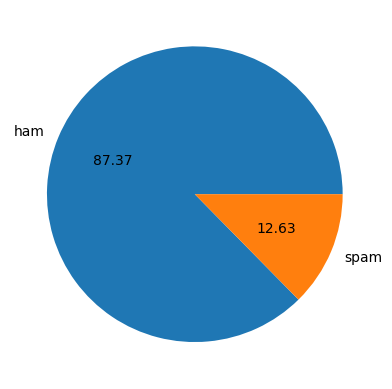

In [213]:
## data is imbalance 
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [214]:
df["no_of_char"] = df["text"].apply(len)

In [215]:
df.head()

,target,text,no_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [216]:
import nltk

In [217]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saroh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Alternative: TreebankWordTokenizer
## If nltk.word_tokenize() has issues, you can use:

In [218]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()
df['num_words'] = df['text'].apply(lambda x: len(tokenizer.tokenize(x)))


In [219]:
df.head()

,target,text,no_of_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [220]:
# df.drop(columns=["word_count"],inplace= True)

In [221]:
df.head()

,target,text,no_of_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [222]:
import re

def count_sentences(text):
    if not isinstance(text, str):  # Handle non-string values
        return 0
    sentences = re.split(r'[.!?]+', text)  # Split using `.`, `!`, or `?`
    sentences = [s.strip() for s in sentences if s.strip()]  # Remove empty sentences
    return len(sentences)


In [223]:
df["sentence_count"] = df["text"].apply(count_sentences)


In [224]:
df.head()

,target,text,no_of_char,num_words,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,23,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [225]:
df[['no_of_char','num_words','sentence_count']].describe()

,no_of_char,num_words,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,17.695299,2.304508
std,58.236293,12.672457,1.639932
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,14.000000,2.000000
75%,117.000000,25.000000,3.000000
max,910.000000,214.000000,31.000000


In [226]:
import seaborn as sns

<Axes: xlabel='no_of_char', ylabel='Count'>

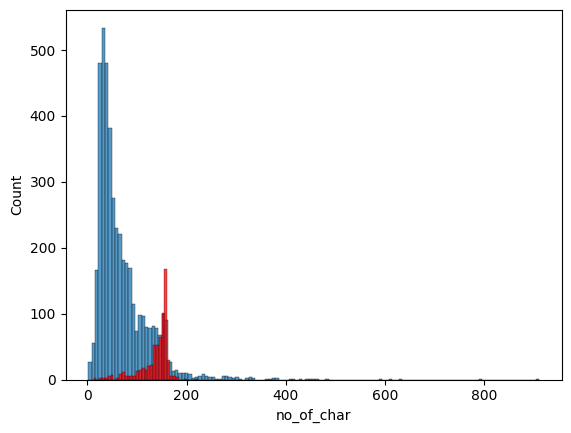

In [227]:
sns.histplot(df[df['target'] == 0]['no_of_char'])
sns.histplot(df[df['target'] == 1]['no_of_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

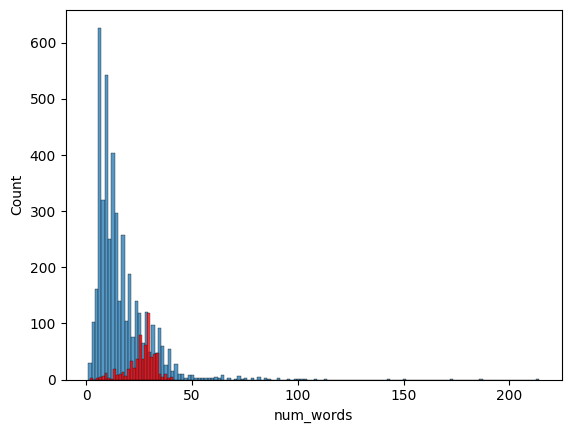

In [228]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
= Removing stop words and punctuation
- Stemming

In [229]:
import nltk
import string
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK resources
nltk.download('stopwords')

# Initialize tokenizer and stemmer
tokenizer = TreebankWordTokenizer()
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = tokenizer.tokenize(text)  # Use TreebankWordTokenizer instead of word_tokenize
    
    y = []
    for i in text:
        if i.isalnum():  # Keep only alphanumeric words
            y.append(i)
    
    text = y[:] # cloneing the list 
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))  # Apply stemming
    
    return " ".join(y)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saroh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [230]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [231]:
# import string

# def transform_text(text):
#     # Convert to lowercase
#     text = text.lower()
    
#     # Split into words manually (alternative to word_tokenize)
#     words = text.split()
    
#     # Remove punctuation
#     words = [word.strip(string.punctuation) for word in words if word.strip(string.punctuation)]
    
#     # Define a minimal stopwords list
#     stopwords_set = {"i", "am", "is", "and", "to", "about", "this", "it", "been", "the", "on", "a"}
    
#     # Remove stopwords
#     words = [word for word in words if word not in stopwords_set]
    
#     # Stemming alternative (basic approach)
#     def porter_stemmer(word):
#         suffixes = ["ing", "ed", "es", "s", "ly"]
#         for suffix in suffixes:
#             if word.endswith(suffix) and len(word) > len(suffix):
#                 return word[:-len(suffix)]
#         return word
    
#     words = [porter_stemmer(word) for word in words]
    
#     return " ".join(words)

# # Example usage
# text = "I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."
# print(transform_text(text))


In [232]:
from nltk.data import find
print(find("tokenizers/punkt"))



C:\Users\saroh\AppData\Roaming\nltk_data\tokenizers\punkt


In [233]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [234]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [235]:
df['transformed_text'] = df['text'].apply(transform_text)

In [236]:
df.head()

,target,text,no_of_char,num_words,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,3,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [237]:
# !pip install wordcloud


In [238]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [239]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

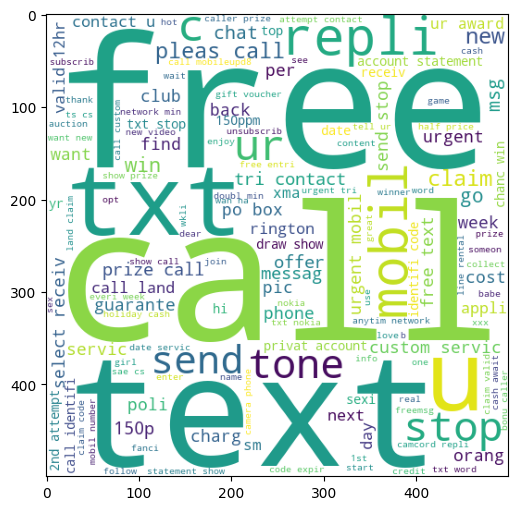

In [240]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [241]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

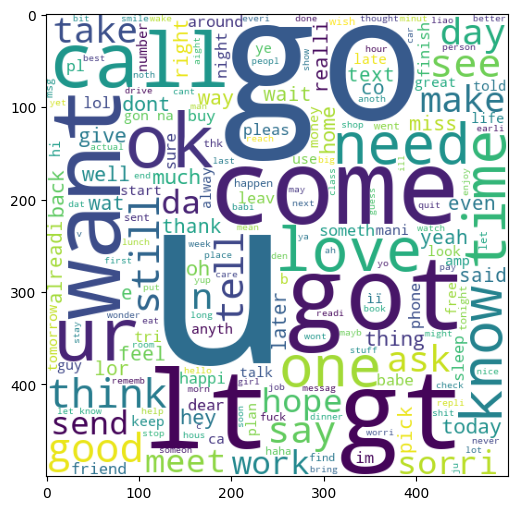

In [242]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [243]:
df.head()

,target,text,no_of_char,num_words,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,3,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [244]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [245]:
len(spam_corpus)

9339

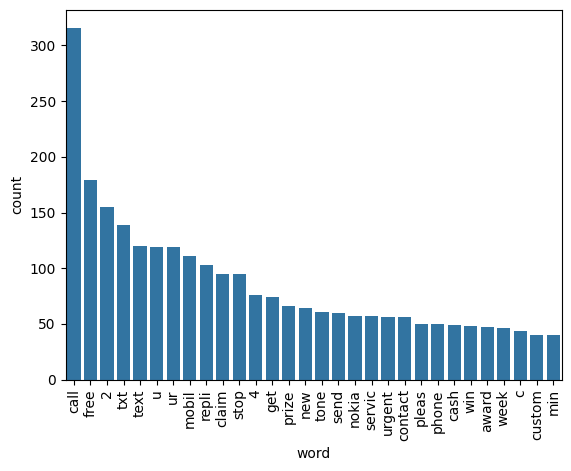

In [246]:
from collections import Counter

import matplotlib.pyplot as plt


# Get most common 30 words from spam_corpus
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Rename columns for clarity
common_words.columns = ['word', 'count']

# Plot using seaborn
sns.barplot(x=common_words['word'], y=common_words['count'])

plt.xticks(rotation='vertical')
plt.show()


In [247]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [248]:
len(ham_corpus)

33008

In [249]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,no_of_char,num_words,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,3,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## Model building



In [250]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [251]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [252]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [253]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [254]:
X.shape

(5169, 3000)

In [255]:
y = df['target'].values

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [258]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [259]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [260]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8568665377176016
[[774 122]
 [ 26 112]]
0.47863247863247865


In [261]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[895   1]
 [ 20 118]]
0.9915966386554622


In [262]:
# !pip install xgboost


In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [264]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [265]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [266]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [267]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9661016949152542)

In [268]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9661016949152542
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9700193423597679
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9428571428571428
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9912280701754386
For  AdaBoost
Accuracy -  0.9235976789168279
Precision -  0.8554216867469879
For  BgC
Accuracy -  0.960348162475822
Precision -  0.8646616541353384
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9590163934426229
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9056603773584906
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [269]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [270]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970019,1.000000
5,RF,0.974855,0.991228
0,SVC,0.972921,0.966102
8,ETC,0.974855,0.959016
4,LR,0.956480,0.942857
10,xgb,0.967118,0.926230
9,GBDT,0.949710,0.905660
7,BgC,0.960348,0.864662
6,AdaBoost,0.923598,0.855422


In [271]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [272]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970019
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.972921
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.956480
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.949710
8,BgC,Accuracy,0.960348
9,AdaBoost,Accuracy,0.923598


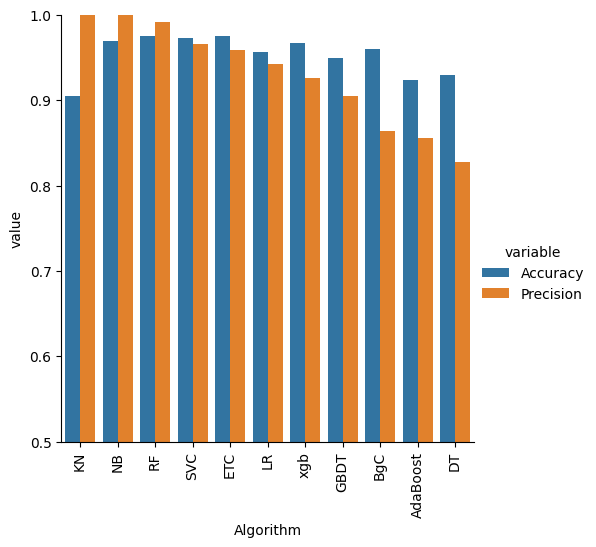

In [273]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [274]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [275]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [276]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [277]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [278]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [279]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [280]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000
2,RF,0.974855,0.991228,0.974855,0.991228,0.974855,0.991228,0.974855,0.991228
3,SVC,0.972921,0.966102,0.972921,0.966102,0.972921,0.966102,0.972921,0.966102
4,ETC,0.974855,0.959016,0.974855,0.959016,0.974855,0.959016,0.974855,0.959016
5,LR,0.956480,0.942857,0.956480,0.942857,0.956480,0.942857,0.956480,0.942857
6,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
7,GBDT,0.949710,0.905660,0.949710,0.905660,0.949710,0.905660,0.949710,0.905660
8,BgC,0.960348,0.864662,0.960348,0.864662,0.960348,0.864662,0.960348,0.864662
9,AdaBoost,0.923598,0.855422,0.923598,0.855422,0.923598,0.855422,0.923598,0.855422


In [281]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [282]:
 # mnb.fit(X_train,y_train)

In [283]:

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [284]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [285]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [286]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9833333333333333


In [287]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [288]:
from sklearn.ensemble import StackingClassifier

In [289]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [290]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9758220502901354
Precision 0.9185185185185185


In [ ]:
import pickle
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))